[[199   6]
 [  9 101]]
Accuracy Score of train KNN
100.0
Accuracy Score of test KNN
95.23809523809523
[[202   3]
 [ 20  90]]
Accuracy Score of train KNN
97.13541666666666
Accuracy Score of test KNN
92.6984126984127
[[199   6]
 [  3 107]]
Accuracy Score of train KNN
96.875
Accuracy Score of test KNN
97.14285714285714
[[200   5]
 [  5 105]]
Accuracy Score of train KNN
95.57291666666666
Accuracy Score of test KNN
96.82539682539682
[[199   6]
 [  4 106]]
Accuracy Score of train KNN
96.875
Accuracy Score of test KNN
96.82539682539682
[[199   6]
 [  6 104]]
Accuracy Score of train KNN
96.61458333333334
Accuracy Score of test KNN
96.19047619047619
[[199   6]
 [  4 106]]
Accuracy Score of train KNN
96.875
Accuracy Score of test KNN
96.82539682539682
[[199   6]
 [  6 104]]
Accuracy Score of train KNN
96.875
Accuracy Score of test KNN
96.19047619047619
[[199   6]
 [  6 104]]
Accuracy Score of train KNN
96.61458333333334
Accuracy Score of test KNN
96.19047619047619
[[199   6]
 [  6 104]]
Accuracy

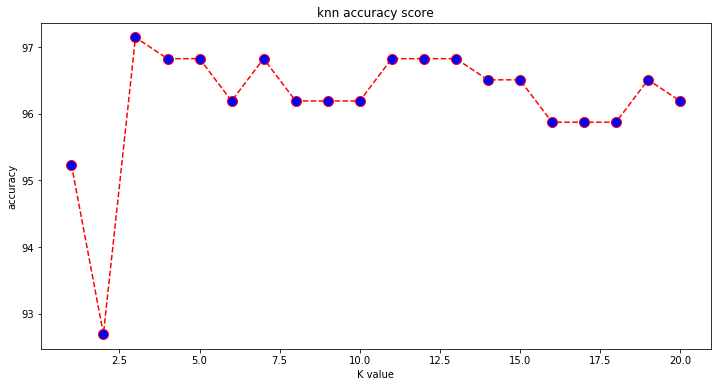

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
data = pd.read_csv("cancer.csv")
data.replace('?',-99999,inplace=True)
data[:147]
data.drop(['id'],axis=1,inplace=True)
data
X = np.array(data.drop(['classes'],1))
y= np.array(data['classes'])
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_
#knn classification
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range (1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    #predict
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm_kNN = confusion_matrix(y_test , y_pred)
    print(cm_kNN)
    print("Accuracy Score of train KNN")
    print(accuracy_score(y_train,trained_model.predict(X_train))*100)
    print("Accuracy Score of test KNN")
    print(accuracy_score(y_test,y_pred)*100)
    knn.append(accuracy_score(y_test,y_pred)*100)
plt.figure(figsize=(12,6))
plt.plot(range(1,21),knn,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("knn accuracy score")
plt.xlabel("K value")
plt.ylabel("accuracy")
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
trained_model= classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test,y_pred)
print("the confusion matrix of SVM is\n",cm_SVM)
print("Accuracy Score of train SVM is")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)
print("Accuracy of test model is")
print(accuracy_score(y_test,y_pred)*100)